In [1]:
import json
import cv2
import os
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# load metadata and index
with open('./dataset/metadata.json', 'r') as f:
    meta_index = json.load(f)

In [3]:

def load_image(meta):
    '''
    Read images
    '''
    image_path = os.path.join('./dataset/images', meta['task_id'], meta['step'])
    return cv2.imread(image_path)[..., ::-1]


In [4]:

def draw_meta(image, meta):
    '''
    Visualize metadata, draw eyes points and gaze point on the screen
    '''
    result_image = np.array(image)
    image_size = image.shape[:2]
    # draw eyes points 
    for point in [
        meta['eyes_left_left'],
        meta['eyes_left_right'],
        meta['eyes_right_left'],
        meta['eyes_right_right']
    ]:
        result_image = cv2.circle(result_image, point, max(2, int(image_size[0] * 0.01)), (0, 255, 0), -1)

    # visualize point of gaze on the screen
    screen = np.zeros((meta['screen_size_y'], meta['screen_size_x'], 3), dtype=np.uint8)
    gaze = [int(meta['screen_size_x'] * (meta['relative_x'])), int(meta['screen_size_y'] * meta['relative_y'])]
    screen = cv2.circle(screen, gaze, max(2, int(meta['screen_size_x'] * 0.02)), (255, 0, 0), -1)
    return result_image, screen

In [5]:

def crop_image(image, bbox):
    '''
    Crop bbox from image
    '''
    x, y, w, h = bbox
    w_matrix = [1, 0, float(x)]
    h_matrix = [0, 1, float(y)]

    image = cv2.warpAffine(
        image,
        np.column_stack((w_matrix, h_matrix)).T,
        (w, h),
        flags=cv2.INTER_LINEAR | cv2.WARP_INVERSE_MAP,
        borderMode=cv2.BORDER_REPLICATE,
    )
    return image

# create bounding box of eyes field and crop it from image to further train
def crop_eyes(image, meta):
    '''
    Create bounding box from eyes points and crop eyes field from image to further train and inference
    '''
    left_left_point, left_right_point, right_left_point, right_right_point = [
        meta['eyes_left_left'],
        meta['eyes_left_right'],
        meta['eyes_right_left'],
        meta['eyes_right_right']
    ]
    left_med = [(left_left_point[0] + left_right_point[0]) / 2, (left_left_point[1] + left_right_point[1]) / 2]
    right_med = [(right_left_point[0] + right_right_point[0]) / 2, (right_left_point[1] + right_right_point[1]) / 2]

    left_dist = np.sqrt(
        (left_left_point[0] - left_right_point[0]) ** 2 + (left_left_point[1] - left_right_point[1]) ** 2
    )
    right_dist = np.sqrt(
        (right_left_point[0] - right_right_point[0]) ** 2 + (right_left_point[1] - right_right_point[1]) ** 2
    )
    mean_dist = (left_dist + right_dist) / 2

    cropped_image = crop_image(
        image,
        bbox=[
            int(min(left_med[0] - mean_dist, right_med[0] - mean_dist)),
            int(min(left_med[1] - mean_dist, right_med[1] - mean_dist)),
            int(2 * mean_dist + abs(left_med[0] - right_med[0])),
            int(2 * mean_dist + abs(left_med[1] - right_med[1])),
        ],
    )
    return cropped_image

{'task_id': '8f0ba296-96d9-4ff0-8de9-13cc0e2ae671', 'step': 'step_10.jpeg', 'relative_x': 0.9916642428520692, 'relative_y': 0.7643135904862198, 'screen_size_x': 1280, 'screen_size_y': 1024, 'screen_size_cm_x': 33.73118996151058, 'screen_size_cm_y': 26.98495196920847, 'diagonal_cm': 43.197, 'type': 'gaze_on_random_point', 'is_notebook': False, 'eyes_left_left': [654, 683], 'eyes_left_right': [572, 691], 'eyes_right_left': [471, 701], 'eyes_right_right': [400, 708], 'split': 'train'}


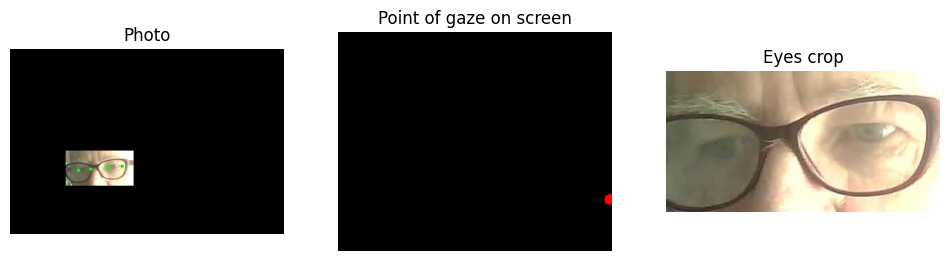

{'task_id': '300cf834-7153-4620-bb21-96de4b59022b', 'step': 'step_5.jpeg', 'relative_x': 0.4190142803553533, 'relative_y': 0.36381833270950503, 'screen_size_x': 1366, 'screen_size_y': 768, 'screen_size_cm_x': 34.1096227997412, 'screen_size_cm_y': 19.177298909371334, 'diagonal_cm': 39.131, 'type': 'gaze_on_random_point', 'is_notebook': True, 'eyes_left_left': [764, 394], 'eyes_left_right': [712, 400], 'eyes_right_left': [646, 406], 'eyes_right_right': [593, 411], 'split': 'train'}


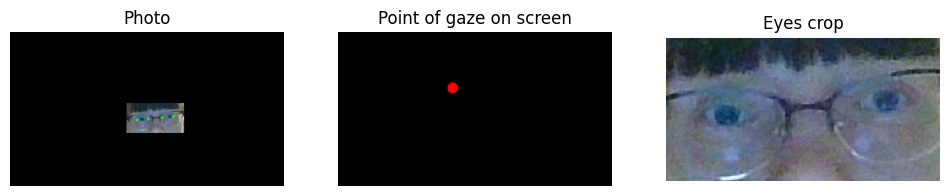

{'task_id': '870161f9-417e-4f24-98a6-b59721c7357e', 'step': 'step_0.jpeg', 'relative_x': 0.0, 'relative_y': 0.0, 'screen_size_x': 1366, 'screen_size_y': 768, 'screen_size_cm_x': 33.2239981858919, 'screen_size_cm_y': 18.67937818943264, 'diagonal_cm': 38.115, 'type': 'gaze_on_fixed_point', 'is_notebook': True, 'eyes_left_left': [433, 289], 'eyes_left_right': [411, 283], 'eyes_right_left': [375, 274], 'eyes_right_right': [342, 267], 'split': 'train'}


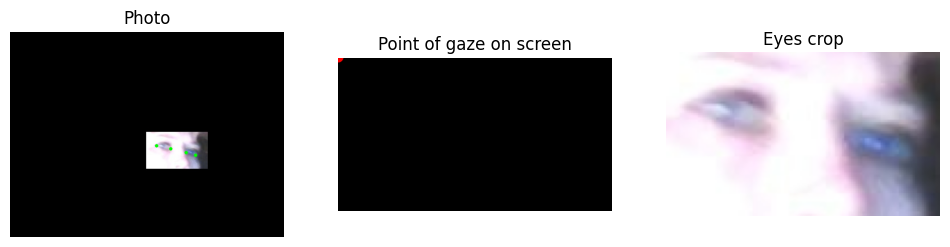

{'task_id': '1933c3eb-830f-49ce-b970-338094d182ce', 'step': 'step_10.jpeg', 'relative_x': 0.987506311850516, 'relative_y': 0.902853311848691, 'screen_size_x': 1920, 'screen_size_y': 1080, 'screen_size_cm_x': 34.10562234322074, 'screen_size_cm_y': 19.18441256806167, 'diagonal_cm': 39.131, 'type': 'gaze_on_random_point', 'is_notebook': True, 'eyes_left_left': [390, 281], 'eyes_left_right': [340, 287], 'eyes_right_left': [282, 291], 'eyes_right_right': [232, 292], 'split': 'train'}


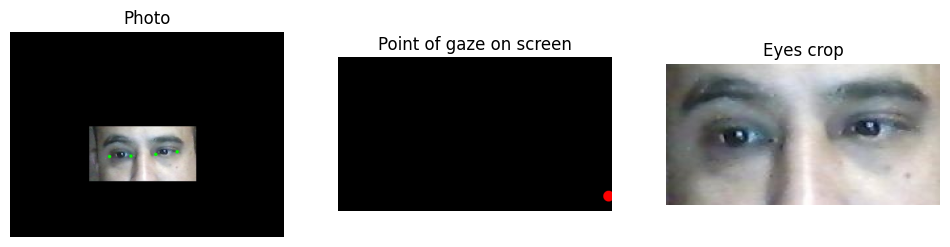

{'task_id': '11f2a463-2183-4787-8fea-128447fb5174', 'step': 'step_6.jpeg', 'relative_x': 0.8906106751198104, 'relative_y': 0.3171484581789843, 'screen_size_x': 1366, 'screen_size_y': 768, 'screen_size_cm_x': 34.1096227997412, 'screen_size_cm_y': 19.177298909371334, 'diagonal_cm': 39.131, 'type': 'gaze_on_random_point', 'is_notebook': True, 'eyes_left_left': [422, 258], 'eyes_left_right': [386, 263], 'eyes_right_left': [345, 264], 'eyes_right_right': [309, 262], 'split': 'train'}


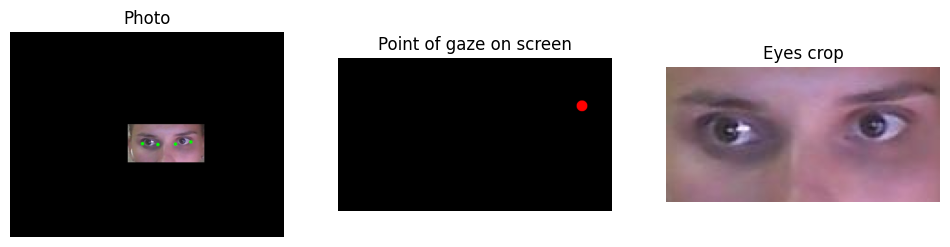

{'task_id': 'bac91d13-ae2d-4ac7-8206-bdd695f339cb', 'step': 'step_1.jpeg', 'relative_x': 1.0, 'relative_y': 0.0, 'screen_size_x': 1600, 'screen_size_y': 900, 'screen_size_cm_x': 37.649448477169145, 'screen_size_cm_y': 21.177814768407647, 'diagonal_cm': 43.197, 'type': 'gaze_on_fixed_point', 'is_notebook': True, 'eyes_left_left': [690, 320], 'eyes_left_right': [645, 321], 'eyes_right_left': [589, 322], 'eyes_right_right': [544, 321], 'split': 'train'}


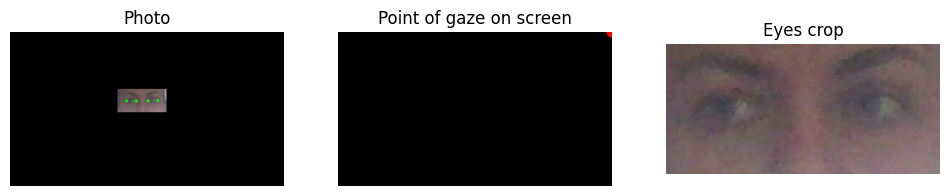

{'task_id': 'c49a1beb-33e3-4ba3-99eb-b4ec09f6b9c0', 'step': 'step_11.jpeg', 'relative_x': 0.3287251197713402, 'relative_y': 0.5593300415239325, 'screen_size_x': 1920, 'screen_size_y': 1080, 'screen_size_cm_x': 44.2934687966696, 'screen_size_cm_y': 24.91507619812665, 'diagonal_cm': 50.82, 'type': 'gaze_on_random_point', 'is_notebook': False, 'eyes_left_left': [487, 279], 'eyes_left_right': [457, 278], 'eyes_right_left': [416, 275], 'eyes_right_right': [384, 270], 'split': 'train'}


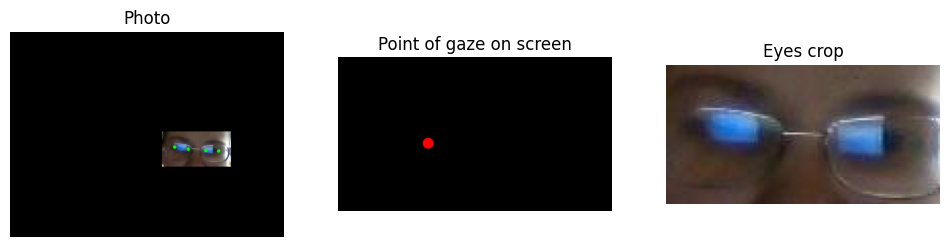

{'task_id': '030d506b-89cc-4430-a176-59051650ce7e', 'step': 'step_6.jpeg', 'relative_x': 0.0012741570958203494, 'relative_y': 0.8344228308128412, 'screen_size_x': 1920, 'screen_size_y': 1078, 'screen_size_cm_x': 34.120798955352456, 'screen_size_cm_y': 19.15740691347393, 'diagonal_cm': 39.131, 'type': 'gaze_on_random_point', 'is_notebook': True, 'eyes_left_left': [399, 222], 'eyes_left_right': [358, 219], 'eyes_right_left': [303, 217], 'eyes_right_right': [260, 218], 'split': 'train'}


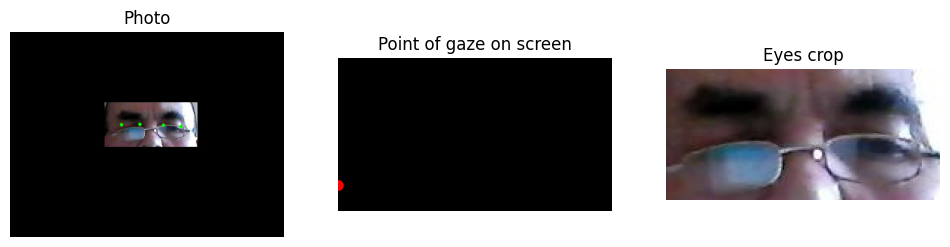

{'task_id': '457fa1d6-151f-4efa-b99a-594cff5d23c3', 'step': 'step_5.jpeg', 'relative_x': 0.829352375819121, 'relative_y': 0.8836143853410151, 'screen_size_x': 1920, 'screen_size_y': 1080, 'screen_size_cm_x': 34.10562234322074, 'screen_size_cm_y': 19.18441256806167, 'diagonal_cm': 39.131, 'type': 'gaze_on_random_point', 'is_notebook': True, 'eyes_left_left': [405, 285], 'eyes_left_right': [372, 285], 'eyes_right_left': [328, 285], 'eyes_right_right': [295, 285], 'split': 'train'}


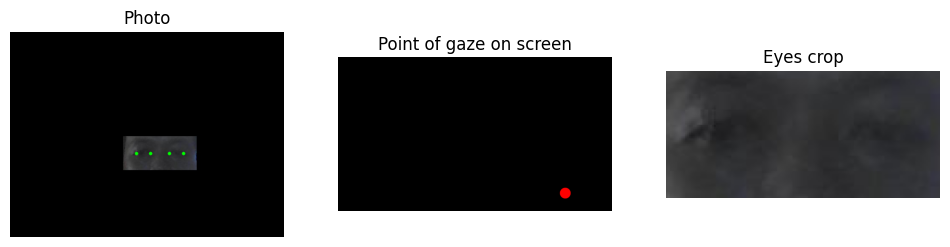

{'task_id': 'a3e48434-0532-4052-8b38-9d6e8ab65987', 'step': 'step_0.jpeg', 'relative_x': 0.0, 'relative_y': 0.0, 'screen_size_x': 1920, 'screen_size_y': 1080, 'screen_size_cm_x': 31.005428157668714, 'screen_size_cm_y': 17.44055333868865, 'diagonal_cm': 35.574, 'type': 'gaze_on_fixed_point', 'is_notebook': True, 'eyes_left_left': [723, 289], 'eyes_left_right': [685, 289], 'eyes_right_left': [633, 290], 'eyes_right_right': [591, 292], 'split': 'train'}


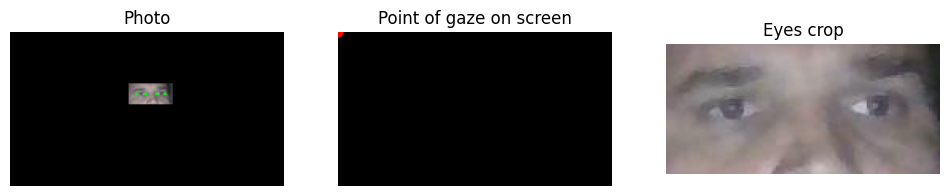

In [6]:
for meta in meta_index[10:1000:100]:
    image = load_image(meta)
    image_with_meta, screen = draw_meta(image, meta)
    image_crop = crop_eyes(image, meta)
    fig, ax = plt.subplots(1, 3, figsize=(12, 5))
    print(meta)
    ax[0].imshow(image_with_meta); ax[0].set_axis_off(); ax[0].set_title('Photo')
    ax[1].imshow(screen); ax[1].set_axis_off(); ax[1].set_title('Point of gaze on screen')
    ax[2].imshow(image_crop); ax[2].set_axis_off(); ax[2].set_title('Eyes crop')
    plt.show()
